Pixel (11, 20)
Pixel (36, 19)
Pixel (17, 37)
Pixel (32, 36)
Pixel (24, 26)


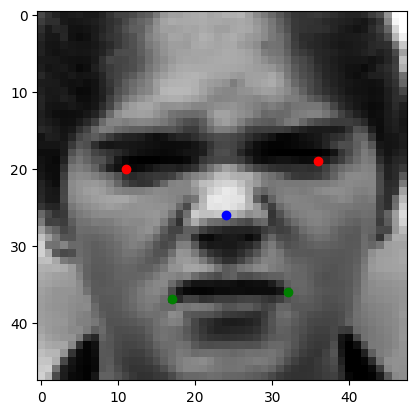

Pixel (37, 20)
Pixel (12, 19)
Pixel (31, 37)
Pixel (16, 36)
Pixel (24, 26)


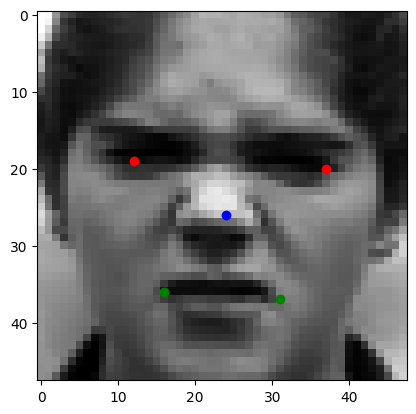

In [ ]:
import cv2
import dlib
import matplotlib.pyplot as plt
import numpy as np

# Load the face image
img = cv2.imread('/content/face/S011_005_00000018.png')

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Load the shape predictor
predictor = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')

# Detect face landmarks
detector = dlib.get_frontal_face_detector()
dets = detector(gray, 1)
for k, d in enumerate(dets):
    shape = predictor(gray, d)

# Extract the coordinates of eyes, lips, and nose
eyes = [(shape.part(36).x, shape.part(36).y), (shape.part(45).x, shape.part(45).y)]
lips = [(shape.part(48).x, shape.part(48).y), (shape.part(54).x, shape.part(54).y)]
nose = [(shape.part(30).x, shape.part(30).y)]

# Plot the original image with landmarks
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
for x, y in eyes:
    plt.scatter(x, y, c='r')
    print(f"Pixel ({x}, {y})")
for x, y in lips:
    plt.scatter(x, y, c='g')
    print(f"Pixel ({x}, {y})")
for x, y in nose:
    plt.scatter(x, y, c='b')
    print(f"Pixel ({x}, {y})")
plt.show()

# Flip the image
flipped_img = cv2.flip(img, 1)

# Plot the flipped image with landmarks
plt.imshow(cv2.cvtColor(flipped_img, cv2.COLOR_BGR2RGB))
for x, y in eyes:
    plt.scatter(img.shape[1] - x, y, c='r')
    print(f"Pixel ({img.shape[1] - x}, {y})")
for x, y in lips:
    plt.scatter(img.shape[1] - x, y, c='g')
    print(f"Pixel ({img.shape[1] - x}, {y})")
for x, y in nose:
    plt.scatter(img.shape[1] - x, y, c='b')
    print(f"Pixel ({img.shape[1] - x}, {y})")
plt.show()

# Print the pixel coordinates where the dot is plotted but not in the image outside
for x, y in eyes + lips + nose:
    if x < 0 or x >= img.shape[1] or y < 0 or y >= img.shape[0]:
        print(f"Pixel ({x}, {y}) is outside the image")